# Exploring Dandiset 001366: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

**Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This Dandiset, titled "Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification" (version 0.250324.1603), contains movies of pial vessels in mice. The data is intended for experiments related to measuring vessel diameter and pulsatility.

You can find more information about this Dandiset on the DANDI Archive:
[https://dandiarchive.org/dandiset/001366/0.250324.1603](https://dandiarchive.org/dandiset/001366/0.250324.1603)

**Citation:** Ranjan, Aditya; Wong, Devin T.; Huang, Qinwen; Ghanizada, Hashmat; Nedergaard, Maiken ; Kelley, Douglas H. ; Boster, Kimberly A. S. (2025) Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification (Version 0.250324.1603) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001366/0.250324.1603

## What this notebook covers

This notebook will guide you through the following steps:
1. Listing required Python packages.
2. Connecting to the DANDI archive and loading basic information about Dandiset 001366.
3. Listing assets within the Dandiset.
4. Selecting an NWB file from the Dandiset.
5. Loading the NWB file and exploring its metadata.
6. Visualizing a frame from the imaging data within the NWB file.
7. Extracting and plotting a time-series from a Region of Interest (ROI) in the imaging data.

## Required Packages

To run this notebook, you will need the following Python packages installed:
- `dandi` (for interacting with the DANDI Archive)
- `pynwb` (for working with NWB files)
- `h5py` (a dependency for NWB, for HDF5 file access)
- `remfile` (for streaming remote files)
- `matplotlib` (for plotting)
- `numpy` (for numerical operations)
- `seaborn` (for enhanced plot styling)

It is assumed that these packages are already installed on your system.

## Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001366"
dandiset_version = "0.250324.1603"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')}") # Use .get for potentially missing fields

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets (or fewer if not available):")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})") # asset.identifier is the asset_id

Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification
Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603
Dandiset description: movies of a pial vessel of mice used in the experiments.

First 5 assets (or fewer if not available):
- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (ID: 71fa07fc-4309-4013-8edd-13213a86a67d)
- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (ID: 2f12bce3-f841-46ca-b928-044269122a59)


## Loading an NWB file

We will now load one of the NWB files from the Dandiset. For this example, we'll use the file:
`sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb`

The asset ID for this file is `2f12bce3-f841-46ca-b928-044269122a59`.
We can construct the download URL for this asset as follows:
`https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/`

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn styling for plots, except for simple image displays
# sns.set_theme() # Applied globally later where appropriate

# URL for the selected NWB asset
nwb_asset_url = "https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/"

print(f"Loading NWB file from: {nwb_asset_url}")

# Load the NWB file
# This uses remfile to allow streaming access to the remote HDF5 file
remote_file = remfile.File(nwb_asset_url)
h5_file = h5py.File(remote_file, mode='r') # Ensure read-only mode
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Ensure read-only mode for pynwb too
nwbfile = io.read()

print("\nNWB file loaded successfully.")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session description: {nwbfile.session_description}")
print(f"Session start time: {nwbfile.session_start_time}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/



NWB file loaded successfully.
Identifier: Qinwen_6th_March_03122024-m4-baseline
Session description: the mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Session start time: 2024-03-12 01:00:00-04:00


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### NWB File Contents Overview

Let's look at some of the metadata and data available in this NWB file.

In [3]:
# Displaying NWB file metadata programmatically
print("--- NWB File Metadata ---")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session Description: {nwbfile.session_description}")
print(f"Session Start Time: {nwbfile.session_start_time}")
if nwbfile.experimenter:
    print(f"Experimenter(s): {', '.join(nwbfile.experimenter)}")
else:
    print("Experimenter(s): Not specified")

if nwbfile.subject:
    print("\n--- Subject Information ---")
    print(f"  ID: {nwbfile.subject.subject_id if nwbfile.subject.subject_id else 'N/A'}")
    print(f"  Age: {nwbfile.subject.age if nwbfile.subject.age else 'N/A'}")
    print(f"  Sex: {nwbfile.subject.sex if nwbfile.subject.sex else 'N/A'}")
    print(f"  Species: {nwbfile.subject.species if nwbfile.subject.species else 'N/A'}")
    print(f"  Strain: {nwbfile.subject.strain if nwbfile.subject.strain else 'N/A'}")
else:
    print("\n--- Subject Information ---")
    print("  No subject information available.")

print("\n--- Acquisition Data ---")
print("The primary data seems to be stored under nwbfile.acquisition. Let's list what's available:")

--- NWB File Metadata ---
Identifier: Qinwen_6th_March_03122024-m4-baseline
Session Description: the mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Session Start Time: 2024-03-12 01:00:00-04:00
Experimenter(s): Huang, Qinwen

--- Subject Information ---
  ID: 031224_M4
  Age: P2M
  Sex: M
  Species: Mus musculus
  Strain: C57BL/6

--- Acquisition Data ---
The primary data seems to be stored under nwbfile.acquisition. Let's list what's available:


In [4]:
print("Available acquisition objects:")
for acq_name in nwbfile.acquisition:
    print(f"- {acq_name} (type: {type(nwbfile.acquisition[acq_name])})")

Available acquisition objects:
- Movies (type: <class 'pynwb.image.ImageSeries'>)


It appears we have an `ImageSeries` named "Movies". Let's get more details about it.

In [5]:
if "Movies" in nwbfile.acquisition:
    movies_series = nwbfile.acquisition["Movies"]
    print("Details for 'Movies' ImageSeries:")
    print(f"  Description: {movies_series.description}")
    print(f"  Unit: {movies_series.unit}")
    print(f"  Data shape: {movies_series.data.shape}")
    print(f"  Data dtype: {movies_series.data.dtype}")
    print(f"  Frame rate: {movies_series.rate} Hz (Starting time: {movies_series.starting_time} {movies_series.starting_time_unit})")
    print(f"  Dimensions: {movies_series.dimension}") # (height, width) or (t, height, width) etc. often implied by shape
else:
    print("'Movies' ImageSeries not found in acquisition.")

Details for 'Movies' ImageSeries:
  Description: 16-bit grayscale movie of a pial vessel
  Unit: n.a.
  Data shape: (6000, 512, 512)
  Data dtype: uint16
  Frame rate: 30.0 Hz (Starting time: 0.0 seconds)
  Dimensions: None


The `Movies.data` field is a 3D dataset with shape (timestamps, height, width) and `uint16` data type. This represents the frames of the pial vessel movie.

### Explore this NWB file on Neurosift
You can explore this NWB file interactively on Neurosift using the following link:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/&dandisetId=001366&dandisetVersion=0.250324.1603](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/&dandisetId=001366&dandisetVersion=0.250324.1603)
(Note: Neurosift link was constructed based on the provided pattern, replacing `draft` with the specific version of the dandiset.)

## Visualizing Data from the NWB File

### Displaying a Single Frame
Let's load and display the first frame of the movie to get a visual idea of the data.

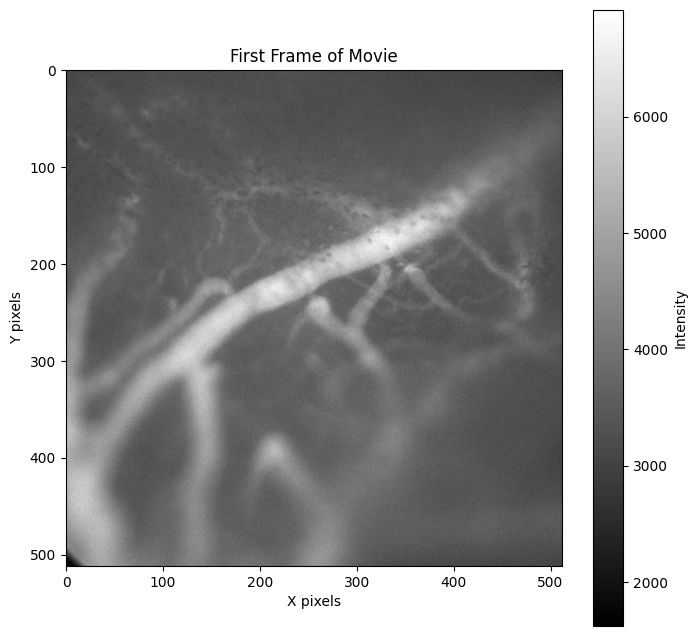

In [6]:
if "Movies" in nwbfile.acquisition:
    movies_data = nwbfile.acquisition["Movies"].data

    if movies_data.shape[0] > 0:
        # Load the first frame
        # Accessing data like movies_data[0, :, :] loads it into memory
        first_frame = movies_data[0, :, :]

        plt.figure(figsize=(8, 8))
        plt.imshow(first_frame, cmap='gray')
        plt.title('First Frame of Movie')
        plt.xlabel('X pixels')
        plt.ylabel('Y pixels')
        plt.colorbar(label='Intensity')
        plt.show()
    else:
        print("Movie data is empty, cannot display a frame.")
else:
    print("'Movies' ImageSeries not found, cannot display a frame.")

The image above shows the first frame from the `Movies` ImageSeries. We can see what appears to be a pial blood vessel.

To better understand where our subsequent Region of Interest (ROI) analysis will focus, let's define the ROI and display it on this first frame.
We'll use an ROI from y=240 to y=260 and x=200 to x=220 pixels.

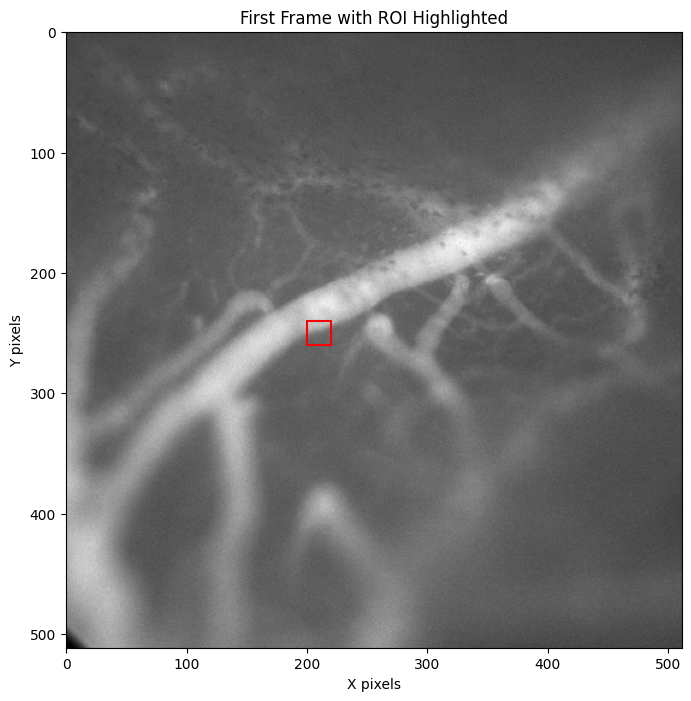

In [7]:
if "Movies" in nwbfile.acquisition:
    movies_data = nwbfile.acquisition["Movies"].data
    if movies_data.shape[0] > 0:
        first_frame = movies_data[0, :, :] # Assuming first_frame is still needed or can be reloaded

        # Define ROI coordinates
        roi_y_start, roi_y_end = 240, 260
        roi_x_start, roi_x_end = 200, 220

        # Create a figure to display the frame with the ROI
        fig, ax = plt.subplots(1, figsize=(8,8))
        ax.imshow(first_frame, cmap='gray')
        
        # Create a rectangle patch for the ROI
        import matplotlib.patches as patches
        rect = patches.Rectangle((roi_x_start, roi_y_start), roi_x_end - roi_x_start, roi_y_end - roi_y_start,
                                 linewidth=1.5, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
        
        ax.set_title('First Frame with ROI Highlighted')
        ax.set_xlabel('X pixels')
        ax.set_ylabel('Y pixels')
        # plt.colorbar(label='Intensity') # Colorbar might be redundant if shown already
        plt.show()
    else:
        print("Movie data is empty, cannot display ROI on frame.")
else:
    print("'Movies' ImageSeries not found, cannot display ROI on frame.")

### Plotting Mean Intensity in an ROI Over Time

The Dandiset is related to vessel pulsatility. We can investigate this by selecting a Region of Interest (ROI) within a vessel and plotting the mean pixel intensity in that ROI over time. Changes in intensity might correlate with blood flow or vessel diameter changes.

We will use the ROI highlighted above (y=240-260, x=200-220 pixels) and process the first 300 frames (10 seconds at 30 Hz).

Processing 300 frames for ROI analysis...


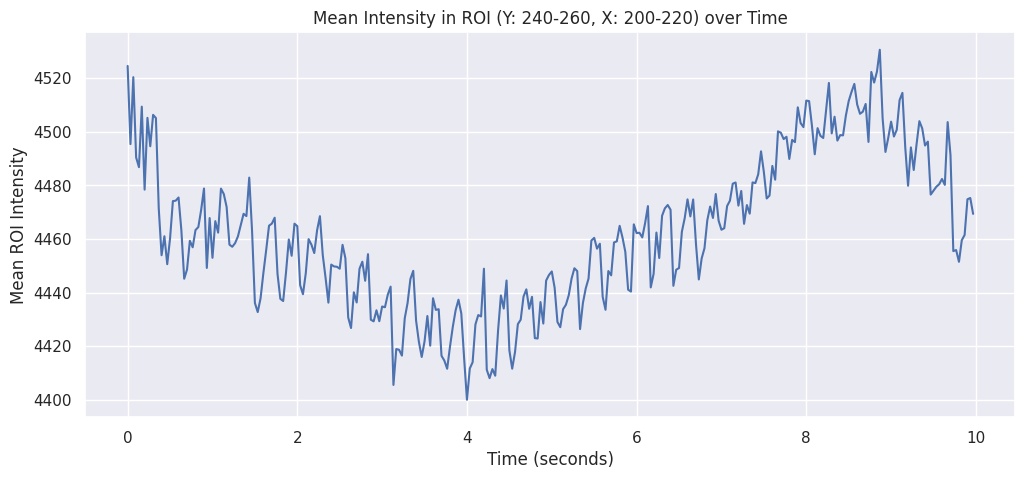

In [8]:
if "Movies" in nwbfile.acquisition:
    movies_data = nwbfile.acquisition["Movies"].data # Ensure movies_data is defined in this cell's scope
    frame_rate = nwbfile.acquisition["Movies"].rate

    # Define ROI coordinates (same as above for consistency)
    roi_y_start, roi_y_end = 240, 260
    roi_x_start, roi_x_end = 200, 220

    # Number of frames to process
    num_frames_to_process = 300
    if num_frames_to_process > movies_data.shape[0]:
        num_frames_to_process = movies_data.shape[0] # Ensure we don't exceed available frames

    if num_frames_to_process > 0:
        mean_roi_intensity = []
        print(f"Processing {num_frames_to_process} frames for ROI analysis...")
        for i in range(num_frames_to_process):
            # Load only the ROI part of the frame to minimize data transfer/memory
            frame_roi = movies_data[i, roi_y_start:roi_y_end, roi_x_start:roi_x_end]
            mean_roi_intensity.append(np.mean(frame_roi))
        
        mean_roi_intensity = np.array(mean_roi_intensity)

        # Create a time vector
        time_vector = np.arange(num_frames_to_process) / frame_rate

        # Apply seaborn theme for this plot
        sns.set_theme()
        
        # Plot the time series
        plt.figure(figsize=(12, 5))
        plt.plot(time_vector, mean_roi_intensity)
        plt.title(f'Mean Intensity in ROI (Y: {roi_y_start}-{roi_y_end}, X: {roi_x_start}-{roi_x_end}) over Time')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Mean ROI Intensity')
        plt.grid(True)
        plt.show()
        
        # Reset to default theme if other plots should not use seaborn a
        # import matplotlib as mpl
        # mpl.rcParams.update(mpl.rcParamsDefault)
        # However, for consistency, subsequent plots might also benefit from seaborn unless specified otherwise.
    else:
        print(f"Not enough frames ({movies_data.shape[0]}) to process for ROI.")
else:
    print("'Movies' ImageSeries not found, cannot perform ROI analysis.")

The plot above shows the average pixel intensity within the selected ROI over the first 10 seconds of the recording. Oscillations are visible, which might correspond to physiological signals like the cardiac cycle, indicating changes in blood volume or flow within the vessel. Further analysis, such as spectral analysis, could quantify the frequency of these oscillations.

## Summary and Future Directions

This notebook demonstrated how to:
- Connect to the DANDI Archive and retrieve information about Dandiset 001366.
- List assets and select a specific NWB file.
- Load an NWB file (`sub-031224-M4/..._image.nwb`) containing 2-photon imaging data of pial vessels.
- Explore basic metadata of the NWB file.
- Visualize a single frame from the imaging data.
- Extract and plot a time-series of mean intensity from an ROI, revealing potential physiological signals.

**Possible Future Directions:**
1.  **Extended ROI Analysis:** Analyze ROIs from different locations or of different sizes.
2.  **Vessel Diameter Quantification:** Implement or adapt algorithms to measure vessel diameter from the images. The Dandiset keywords mention "full width at half maximum" and "Radon transform," suggesting these techniques could be relevant.
3.  **Pulsatility Analysis:** Perform spectral analysis (e.g., FFT) on the ROI time-series to identify dominant frequencies of pulsation.
4.  **Movement Correction:** If there is subject movement, apply image registration techniques before further analysis.
5.  **Analysis of Other NWB files:** The Dandiset contains another NWB file (`sub-F15/sub-F15_ses-F15BC-19102023_image.nwb`). Similar analyses could be performed on this file to compare results.
6.  **Correlation with other data:** If other physiological data were available (e.g., ECG, respiration), it could be correlated with the imaging data.

This notebook provides a starting point for researchers interested in working with this Dandiset. The data offers opportunities to explore image analysis techniques for quantifying vascular dynamics.

In [9]:
# Close the NWB HDF5 file and the remfile
# It's good practice, though not strictly critical for this tutorial's end.
if 'io' in locals() and io is not None:
    try:
        io.close()
        print("NWB IO closed.")
    except Exception as e:
        print(f"Error closing NWB IO: {e}")

if 'h5_file' in locals() and h5_file is not None:
    try:
        h5_file.close() # remfile.File does not need explicit close if h5_file is closed
        print("H5 file (and underlying remfile) closed.")
    except Exception as e:
        print(f"Error closing H5 file: {e}")

print("End of notebook.")

NWB IO closed.
H5 file (and underlying remfile) closed.
End of notebook.
